# Mini projects

You can do the projects in any order, just choose the ones that you like the most

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

### Cars detector

1. Create a classifier to detect cars in an image
1. If at least one car was detected write Car Detected (in Green) on top of the image, otherwise write No car detected (in Red)
1. Save the image to disk
1. Show the image result inside the notebook
1. Make it work with a video
1. Put a bounding box around the cars detected
1. Get a higher resolution video and extract the car plates and save them to disk

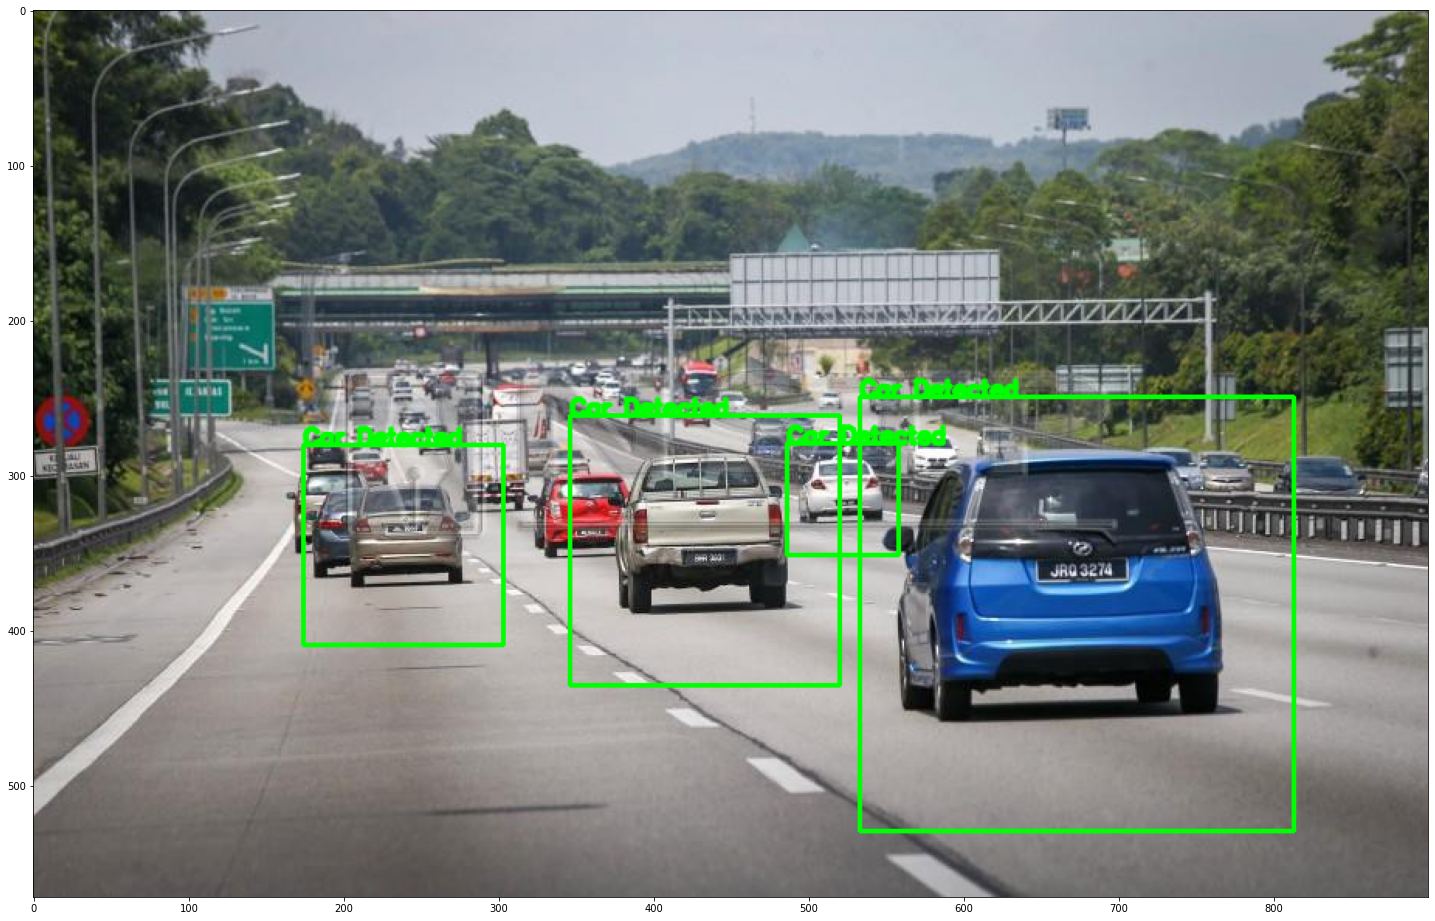

In [27]:
image = cv2.imread('img/cars3.jpg')
image_copy = image.copy()
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)


image_gray = cv2.Canny(image_copy,30,150)

image_gray = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)

car_cascade = cv2.CascadeClassifier("Haarcascades/haarcascade_car.xml")
car_cascade = cv2.CascadeClassifier("Haarcascades/car.xml")


car_rect = car_cascade.detectMultiScale(image_gray,scaleFactor = 1.09, minNeighbors = 5)
# If no faces detected print("No faces found")
if len(car_rect)==0:
    print("No faces found")
else:
# Otherwise draw a rectangle on each face that has been detected
    for (x, y, w, h) in car_rect:
        cv2.rectangle(image_copy, (x, y),
                      (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image_copy, 'Car Detected', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 
                   0.5, (0,255,0), 2, cv2.LINE_AA)
plt.figure(figsize=(25,40))
plt.imshow(image_copy)


In [3]:

# Repeat the process above with your own images
window_name = "filter"
#directory = "/home/umut/Documents/GitHub/Strive_School/Computer_Vision_(Module_6)/Day_7_ Template_matching_corners_and_Haar_cascades/mine_cars"
#os.chdir(directory)


cap = cv2.VideoCapture("videos/cars.mp4")
key = 0 
cv2.namedWindow(window_name,cv2.WINDOW_AUTOSIZE)

car_cascade = cv2.CascadeClassifier("Haarcascades/car.xml")

while (True):
    ret, frame = cap.read()
    gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)


    car_rect = car_cascade.detectMultiScale(gray_frame)


    # If no faces detected print("No faces found")
    if len(car_rect)==0:
        cv2.putText(frame, 'No Car Detected', (50,50), cv2.FONT_HERSHEY_SIMPLEX, 
                   0.5, (0,0,255), 2, cv2.LINE_AA)'savedImage.jpg'
    else:
    # Otherwise draw a rectangle on each face that has been detected
        for (x, y, w, h) in car_rect:
            cv2.rectangle(frame, (x, y),
                        (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, 'Car Detected', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 
                   0.5, (0,255,0), 2, cv2.LINE_AA)
            file_name = str(x)+str(y)+"image.jpg"
            #cv2.imwrite(file_name, frame[y:y+h, x:x+w])

    cv2.imshow(window_name,frame)

    if key == 27:
        break
    
    key = cv2.waitKey(1)



cap.release()

cv2.destroyAllWindows()
cv2.waitKey(1)



-1

### Sudoku Solver

1. Create function that given an image of a Sudoku game crops and extracts each cell 
1. Extract the number from each cropped cell (if blank extract it as 0)
1. Place the extracted numbers in an array (each block of 9 numbers is one array)
1. Apply the sudoku solver to the array to get the solution
1. Write the solution numbers in the cells